In [0]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, metrics
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN

In [0]:

import matplotlib.colors as colors
from itertools import cycle

def plotClustering(X, plt_labels, centers, features=(0,1), ax=plt):
    if features[0] == features[1]:
        ax.hist(
            X[:, features[0]],
            edgecolor='black'
        )
    else:
        ax.scatter(
            X[:,features[0]],
            X[:,features[1]],
            c=plt_labels,
            edgecolor='black',
            alpha=0.8
        )
        ax.scatter(
            centers[:,features[0]],
            centers[:,features[1]],
            c=np.arange(len(centers)),
            edgecolor='red',
            s=100,
            marker='D'
        )

In [0]:
def distances(X, Y):
  D4 = (X**2).sum(axis=1)[np.newaxis].T - 2 * X.dot(Y.T) + (Y**2).sum(axis=1)[np.newaxis]
  return np.sqrt(D4)

def dunn_index(X, labels, C):
    k = np.unique(labels).size
    dissimilarity = min((np.min(euclidean_distances(X[labels == i], X[labels == j]))
                         for i in range(k) for j in range(i + 1, k)))
    diameter = max((np.max(euclidean_distances(X[labels == i], X[labels == i])) for i in range(k)))
    return dissimilarity / diameter

In [0]:
from sklearn import datasets

centers_ = [[1, 1], [3, 3], [5, 1]]
blobX, blobY = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)
moonX, moonY = datasets.make_moons(n_samples=1000, shuffle=False, noise=0.1)

In [0]:
def evaluate_metrics(df, labels, centroids):
    silhouette_score = metrics.silhouette_score(df, labels, metric='euclidean')
    davies_bouldin_score = metrics.davies_bouldin_score(df, labels)
    dunn = dunn_index(df, labels, centroids)
    print(f'Silhouette Coefficient: {silhouette_score}')
    print(f'Davies-Bouldin score: {davies_bouldin_score}')
    print(f'Dunn Index: {dunn}')

    
def get_grouping(group_foo, k, param):
    if group_foo == KMeans:
        return group_foo(n_clusters=k, n_init=param)
    
    if group_foo == Birch:
        return group_foo(threshold=param, n_clusters=k)
    
    
def get_centers(group_foo, grouping, X):
    if group_foo == KMeans:
        return grouping.cluster_centers_
    
    if group_foo == Birch:
        return grouping.subcluster_centers_

def group(X, group_foo, k, r):
    fig, axes = plt.subplots(1, len(r))
    fig.set_size_inches(15,4)
    for ax, param in zip(axes, r):
        grouping = get_grouping(group_foo, k, param)
        grouping.fit(X)
        centers = get_centers(group_foo, grouping, X)
        plotClustering(X, grouping.labels_, centers=centers, ax=ax)
        ax.set_title(f'param: {param}')
        print(param, ":\n")
        evaluate_metrics(X, grouping.labels_, centers)

# A
Number of time the k-means algorithm will be run with different centroid seeds.
The final results will be the best output of n_init consecutive runs in terms of inertia.

1 :

Silhouette Coefficient: 0.32999022410033485
Davies-Bouldin score: 0.9325596119500432
Dunn Index: 0.006176392868541267
10 :

Silhouette Coefficient: 0.3279448135528606
Davies-Bouldin score: 0.9420435996814929
Dunn Index: 0.0027742086857434033
100 :

Silhouette Coefficient: 0.33037321157546595
Davies-Bouldin score: 0.9297312041840728
Dunn Index: 0.003939687675048428


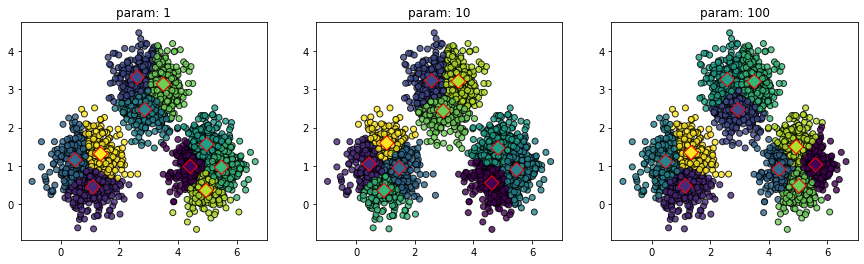

In [46]:
group(blobX, KMeans, k=10, r=[1, 10, 100])

1 :

Silhouette Coefficient: 0.4861333737226048
Davies-Bouldin score: 0.7795430000056705
Dunn Index: 0.01300014842417524
10 :

Silhouette Coefficient: 0.4860520315327438
Davies-Bouldin score: 0.7795454335081473
Dunn Index: 0.013396646538525406
100 :

Silhouette Coefficient: 0.4860520315327438
Davies-Bouldin score: 0.7795454335081473
Dunn Index: 0.013396646538525406


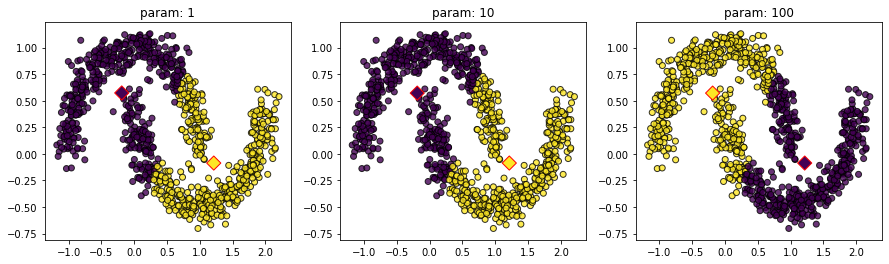

In [47]:
group(moonX, KMeans, k=2, r=[1,10,100])

1 :

Silhouette Coefficient: 0.676234271364563
Davies-Bouldin score: 0.44280590979539136
Dunn Index: 0.03803578457807013
10 :

Silhouette Coefficient: 0.676234271364563
Davies-Bouldin score: 0.44280590979539136
Dunn Index: 0.03803578457807013
100 :

Silhouette Coefficient: 0.676234271364563
Davies-Bouldin score: 0.44280590979539136
Dunn Index: 0.03803578457807013


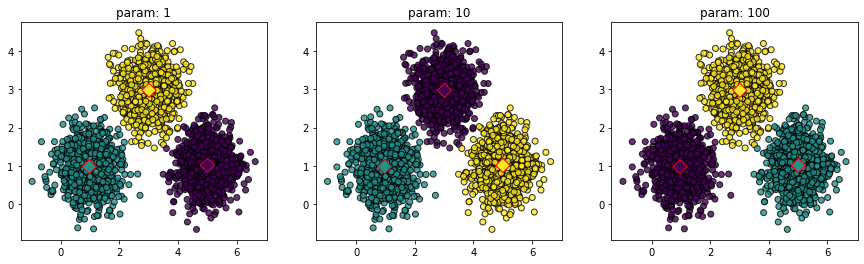

In [48]:
group(blobX, KMeans, k=3, r=[1,10,100])

# B
The radius of the subcluster obtained by merging a new sample and the closest subcluster should be lesser than the threshold.
Otherwise a new subcluster is started. Setting this value to be very low promotes splitting and vice-versa.

0.4 :

Silhouette Coefficient: 0.3026347508027866
Davies-Bouldin score: 0.8775020391342729
Dunn Index: 0.006940626016202819
0.6 :

Silhouette Coefficient: 0.3022683780248523
Davies-Bouldin score: 0.9592242613898635
Dunn Index: 0.0035369195449726646
0.8 :

Silhouette Coefficient: 0.5464568255988819
Davies-Bouldin score: 0.8464207670899694
Dunn Index: 0.005241872877362763
1 :

Silhouette Coefficient: 0.676234271364563
Davies-Bouldin score: 0.44280590979539136
Dunn Index: 0.03803578457807013


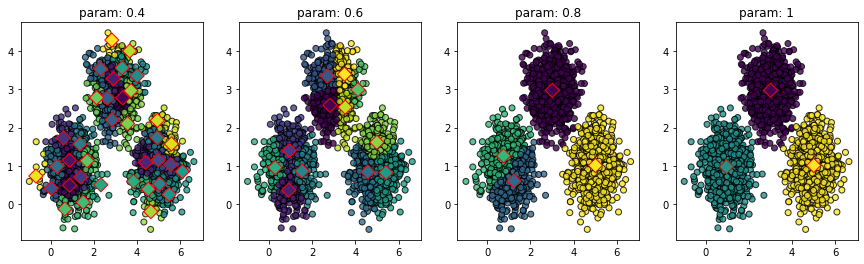

In [49]:
group(blobX, Birch, k=None, r=[0.4, 0.6, 0.8, 1])

0.4 :

Silhouette Coefficient: 0.6757802834560915
Davies-Bouldin score: 0.44343735267490186
Dunn Index: 0.021247799843796038
0.6 :

Silhouette Coefficient: 0.675723988026806
Davies-Bouldin score: 0.44363874748592474
Dunn Index: 0.021247799843796038
0.8 :

Silhouette Coefficient: 0.676234271364563
Davies-Bouldin score: 0.44280590979539136
Dunn Index: 0.03803578457807013
1 :

Silhouette Coefficient: 0.676234271364563
Davies-Bouldin score: 0.44280590979539136
Dunn Index: 0.03803578457807013


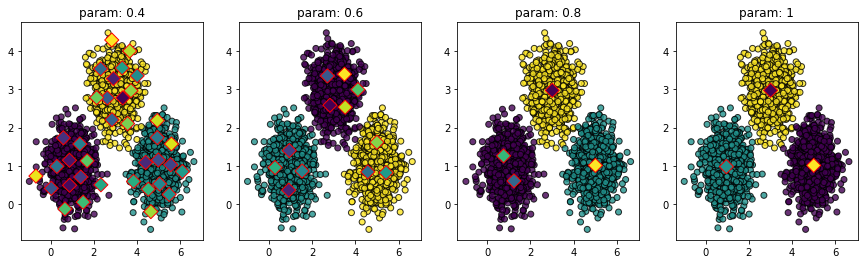

In [50]:
group(blobX, Birch, k=3, r=[0.4, 0.6, 0.8, 1])

0.4 :

Silhouette Coefficient: 0.4592968114187737
Davies-Bouldin score: 0.6689438901909073
Dunn Index: 0.007652055850264815
0.6 :

Silhouette Coefficient: 0.40650867007727365
Davies-Bouldin score: 0.7723160291736129
Dunn Index: 0.005206069297916737
0.8 :

Silhouette Coefficient: 0.458213690313128
Davies-Bouldin score: 0.7655404635904632
Dunn Index: 0.005720315497297893
1 :

Silhouette Coefficient: 0.38108605254233896
Davies-Bouldin score: 0.6832971218795401
Dunn Index: 0.0020282015987208323


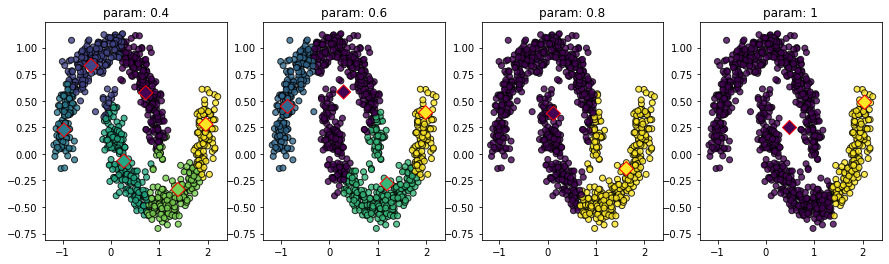

In [51]:
group(moonX, Birch, k=None, r=[0.4, 0.6, 0.8, 1])

#C D
The maximum distance between two samples for one to be considered as in the neighborhood of the other.
This is not a maximum bound on the distances of points within a cluster.
This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

eps: 0.2

Silhouette Coefficient: 0.5230025058053367
Davies-Bouldin score: 1.5453862987069025
Dunn Index: 0.002228359213327105
eps: 0.3

Silhouette Coefficient: 0.6374324487904142
Davies-Bouldin score: 1.6387667793368448
Dunn Index: 0.006186811560853089
eps: 0.5

Silhouette Coefficient: 0.20330034969875208
Davies-Bouldin score: 1.3039364638234654
Dunn Index: 0.060888304662828664


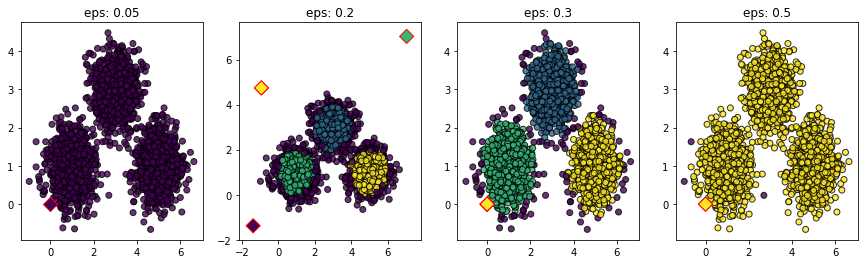

In [52]:
X = blobX
fig, axes = plt.subplots(1,4)
fig.set_size_inches(15,4)
for ax, eps in zip(axes, [0.05, 0.2, 0.3, 0.5]):
    dbscan = DBSCAN(eps=eps, min_samples=25)
    dbscan.fit(X)
        
    labels = dbscan.labels_ - np.min(dbscan.labels_) if any(dbscan.labels_< 0) else dbscan.labels_
    centers = np.empty((X.shape[1],np.unique(labels).size))

    plotClustering(X, dbscan.labels_, centers.T, ax=ax)
    ax.set_title(f'eps: {eps}')

    for i in range(np.unique(labels).shape[0] -1):
        l = X.T[:,labels == i]
        centers[:,i] = np.sum(l, axis=1)/l.shape[1]

    if np.unique(labels).size > 1:
        print(f'eps: {eps}\n')
        evaluate_metrics(X, labels, centers.T)

In [0]:
def plotAll(X, classes):
  group_colors = ['skyblue', 'coral', 'lightgreen', 'black', 'purple', 'red']
  colors = [group_colors[j] for j in classes]

  plot = plt.figure(figsize=(20, 20));
  for i in range(4):
    for j in range(4):
      plt.subplot(4, 4, i*4+j+1)
      plt.scatter(X[:,i], X[:,j], color=colors)

In [0]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data

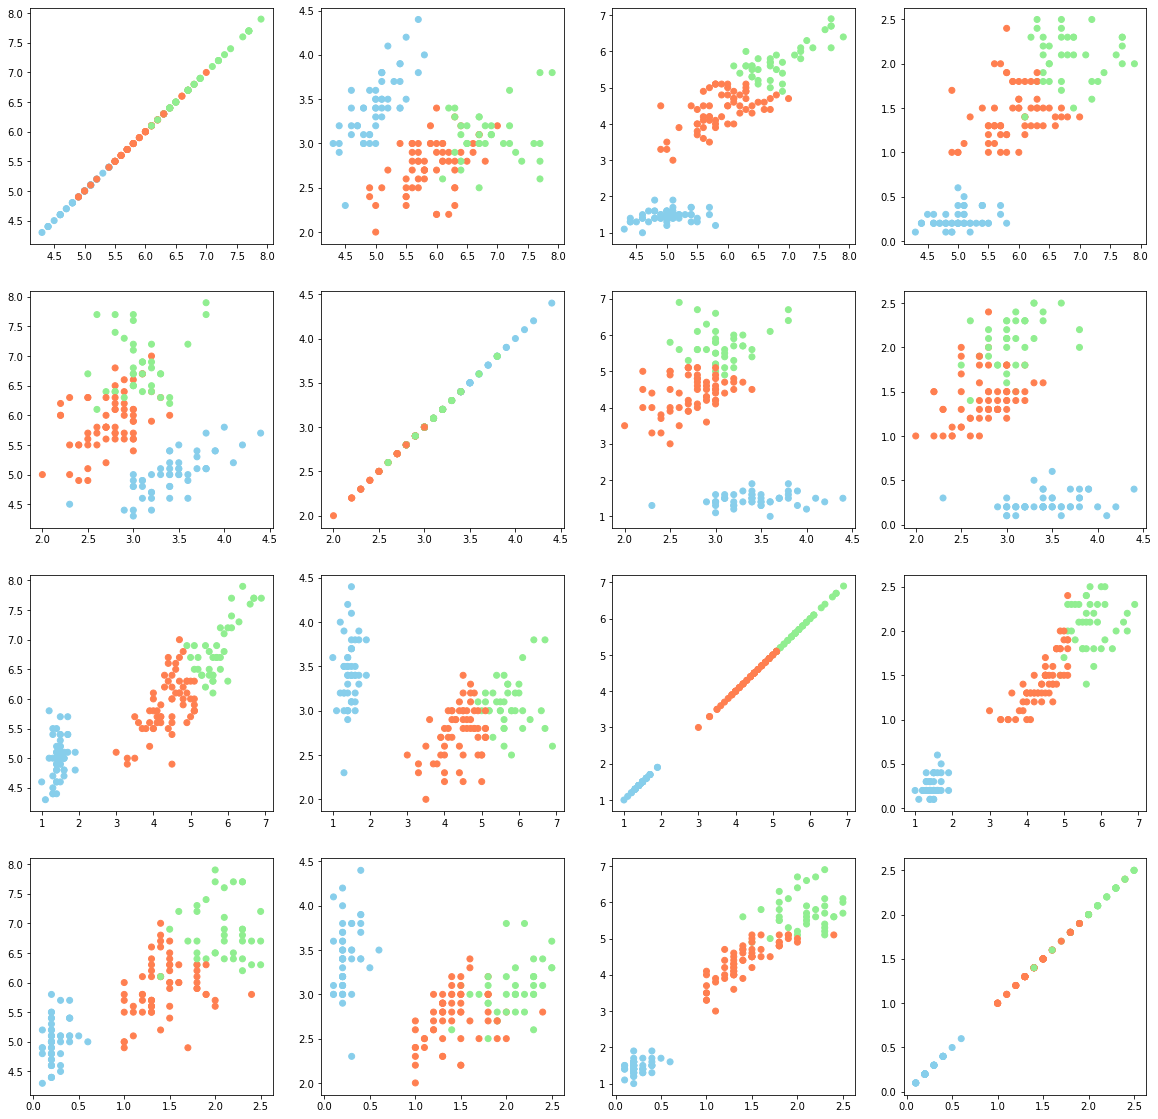

In [59]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)

plotAll(X, k_means.labels_)

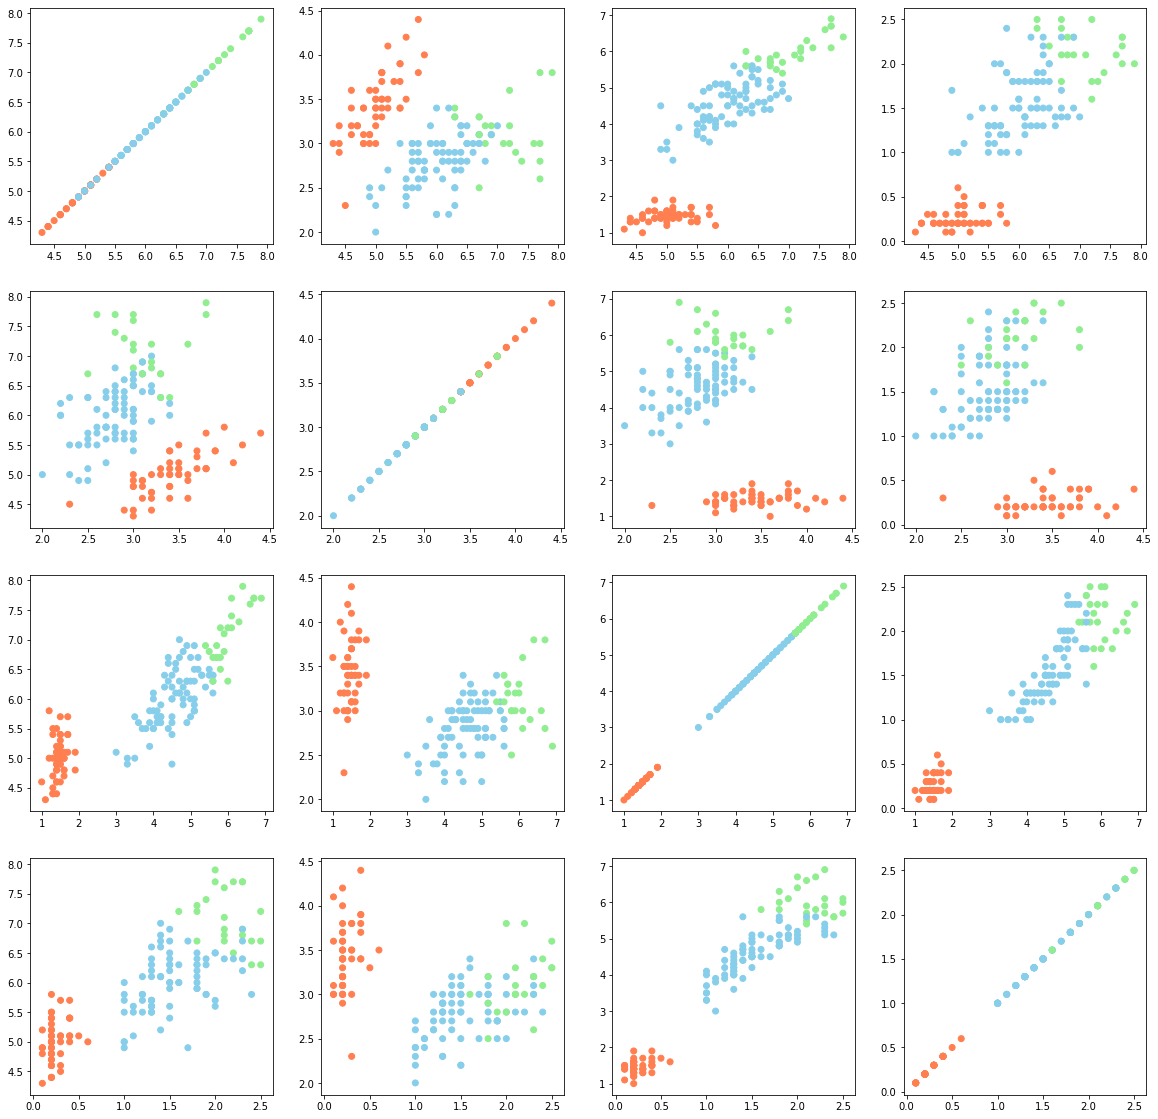

In [61]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

plotAll(X, birch.labels_)

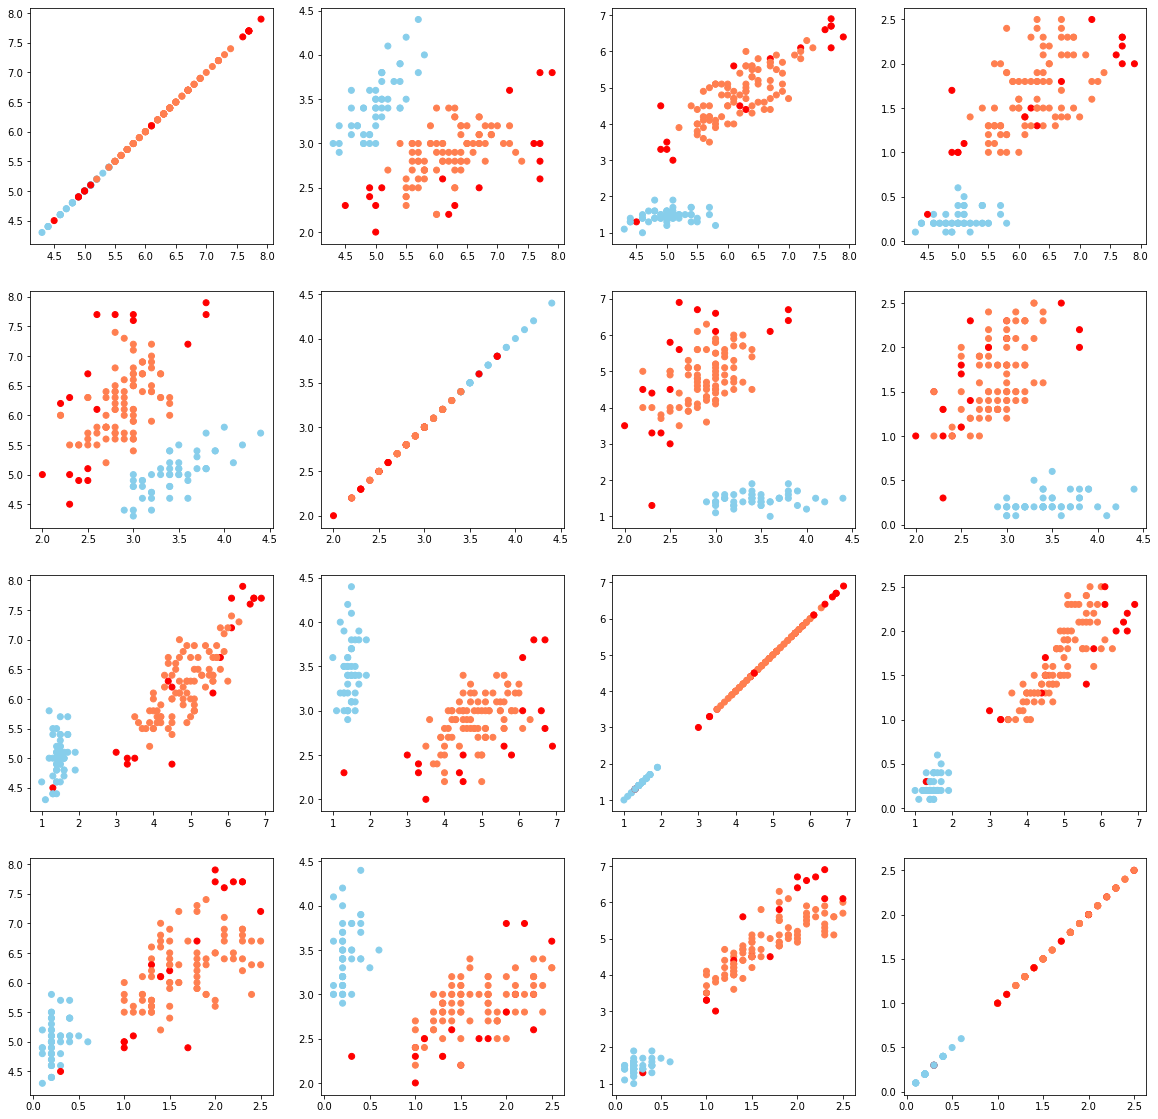

In [62]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

plotAll(X, dbscan.labels_)